In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
df_training = pd.read_csv("data_mod/train_motion_data.csv")
df_test = pd.read_csv("data_mod/test_motion_data.csv")

df_training


AccX      AccY   Class  DiffAccX  DiffAccY
0     0.000000  0.000000  NORMAL  0.000000  0.000000
1    -1.624864 -1.082492  NORMAL -1.624864 -1.082492
2    -0.594660 -0.122410  NORMAL  1.030204  0.960082
3     0.738478 -0.228456  NORMAL  1.333138 -0.106046
4     0.101741  0.777568  NORMAL -0.636737  1.006023
...        ...       ...     ...       ...       ...
3639  0.915688 -2.017489    SLOW  2.374675 -1.824629
3640 -1.934203  0.914925    SLOW -2.849891  2.932414
3641 -0.222845  0.747304    SLOW  1.711359 -0.167621
3642 -0.349423  0.067261    SLOW -0.126579 -0.680043
3643 -0.402428  0.406218    SLOW -0.053005  0.338957

[3644 rows x 5 columns]

In [307]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
dtype: int64

### Change categories to numbers

In [308]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training


AccX      AccY  Class  DiffAccX  DiffAccY
0     0.000000  0.000000      0  0.000000  0.000000
1    -1.624864 -1.082492      0 -1.624864 -1.082492
2    -0.594660 -0.122410      0  1.030204  0.960082
3     0.738478 -0.228456      0  1.333138 -0.106046
4     0.101741  0.777568      0 -0.636737  1.006023
...        ...       ...    ...       ...       ...
3639  0.915688 -2.017489      2  2.374675 -1.824629
3640 -1.934203  0.914925      2 -2.849891  2.932414
3641 -0.222845  0.747304      2  1.711359 -0.167621
3642 -0.349423  0.067261      2 -0.126579 -0.680043
3643 -0.402428  0.406218      2 -0.053005  0.338957

[3644 rows x 5 columns]

### Normalize data

In [309]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

AccX        AccY    DiffAccX    DiffAccY  Class
0      -4.105593    8.126800    0.010300   -0.010421      0
1    -168.957027 -111.696347 -151.542377 -101.201825      0
2     -64.437130   -5.422989   96.098456   89.738101      0
3      70.817107  -17.161393  124.353421   -9.923577      0
4       6.216602   94.197287  -59.378806   94.032688      0
...          ...         ...         ...         ...    ...
3639   88.795978 -215.193071  221.498566 -170.576840      2
3640 -200.341232  109.401604 -265.801873  274.111831      2
3641  -26.714411   90.847295  159.630443  -15.679652      2
3642  -39.556507   15.572024  -11.795809  -63.580862      2
3643  -44.934120   53.091875   -4.933494   31.675331      2

[3644 rows x 5 columns]

In [310]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

AccX        AccY    DiffAccX    DiffAccY  Class
0      67.345100   -9.509000   -0.021340   -0.012385      1
1      57.982946   10.303100   -8.494392   16.758078      1
2     270.452050 -824.010358  192.270076 -706.238535      1
3     229.805029 -828.171460  -36.808209   -3.534656      1
4     283.133326 -732.402479   48.242495   81.053740      1
...          ...         ...         ...         ...    ...
3079  -84.712435  -57.627689  -73.609489   -1.097380      2
3080  145.444037   51.068429  208.277716   91.996249      2
3081  121.268079 -177.287100  -21.901364 -193.309813      2
3082   83.265000   79.069807  -34.415357  216.987532      2
3083  140.063424   35.612446   51.383072  -36.797989      2

[3084 rows x 5 columns]

### Change data to percentiles

In [311]:
"""X_n_quantile = pd.DataFrame(columns=df_training.columns)

quantiles = [0.05, 0.25, 0.5, 0.75, 0.90]
columns = ["AccX", "AccY", "DiffAccX", "DiffAccY", "Class"]

for column in columns:
    data_quantiles = []
    for quan in quantiles:
        if(quan == "Class"):
            data_quantiles.append(int(X_n[column].quantile(quan)))
        else:
            data_quantiles.append(X_n[column].quantile(quan))
    
    X_n_quantile[column] = data_quantiles

X_n_quantile"""

'X_n_quantile = pd.DataFrame(columns=df_training.columns)\n\nquantiles = [0.05, 0.25, 0.5, 0.75, 0.90]\ncolumns = ["AccX", "AccY", "DiffAccX", "DiffAccY", "Class"]\n\nfor column in columns:\n    data_quantiles = []\n    for quan in quantiles:\n        if(quan == "Class"):\n            data_quantiles.append(int(X_n[column].quantile(quan)))\n        else:\n            data_quantiles.append(X_n[column].quantile(quan))\n    \n    X_n_quantile[column] = data_quantiles\n\nX_n_quantile'

In [312]:
X_training  = X_train.drop(columns="Class")
y_training  = X_train.Class

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

## Train model

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [314]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=15, random_state=5)
rfc.fit(X_training, y_training)

RandomForestClassifier(max_depth=15, n_estimators=30, random_state=5)

In [315]:
rfc.score(X_training, y_training)

0.8114709110867179

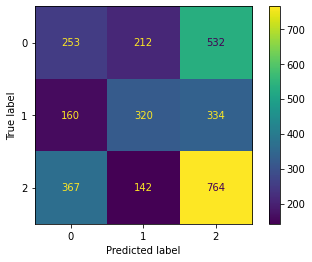

In [358]:
y_pred = rfc.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=rfc.classes_)
display.plot()


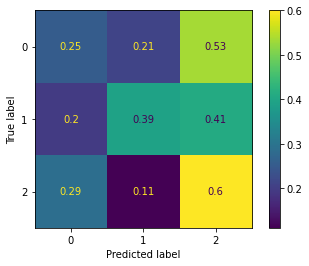

In [360]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=rfc.classes_)
display.plot()

In [317]:
rfc.score(X_test, y_test)

0.4335278858625162

In [318]:
rfc_imp = pd.DataFrame(rfc.feature_importances_, columns=['importance'])

In [319]:
rfc_imp['importance'] = rfc_imp['importance'] * 100
rfc_imp = rfc_imp.set_index(X_training.columns)
rfc_imp


importance
AccX       25.264630
AccY       27.892729
DiffAccX   22.930034
DiffAccY   23.912607

In [320]:
rfc_imp.sort_values(by='importance', ascending=False)

importance
AccY       27.892729
AccX       25.264630
DiffAccY   23.912607
DiffAccX   22.930034

### Train model with GridSearchCV

In [365]:
random_forest = RandomForestClassifier(random_state=0, criterion="entropy", n_jobs=5, max_features=None)

param_grid = {'n_estimators': np.arange(2, 40, 2), 'max_depth': np.arange(3, 30), 'max_leaf_nodes': np.arange(2, 30, 2)}

# best_params: test 47.5% {'max_depth': 7, 'n_estimators': 33}

random_gscv = GridSearchCV(random_forest, param_grid, cv=5, verbose=10)
random_gscv.fit(X_training, y_training)

Fitting 5 folds for each of 7182 candidates, totalling 35910 fits
[CV 1/5; 1/7182] START max_depth=3, max_leaf_nodes=2, n_estimators=2............
[CV 1/5; 1/7182] END max_depth=3, max_leaf_nodes=2, n_estimators=2;, score=0.376 total time=   1.2s
[CV 2/5; 1/7182] START max_depth=3, max_leaf_nodes=2, n_estimators=2............
[CV 2/5; 1/7182] END max_depth=3, max_leaf_nodes=2, n_estimators=2;, score=0.369 total time=   0.2s
[CV 3/5; 1/7182] START max_depth=3, max_leaf_nodes=2, n_estimators=2............
[CV 3/5; 1/7182] END max_depth=3, max_leaf_nodes=2, n_estimators=2;, score=0.383 total time=   0.0s
[CV 4/5; 1/7182] START max_depth=3, max_leaf_nodes=2, n_estimators=2............
[CV 4/5; 1/7182] END max_depth=3, max_leaf_nodes=2, n_estimators=2;, score=0.365 total time=   0.0s
[CV 5/5; 1/7182] START max_depth=3, max_leaf_nodes=2, n_estimators=2............
[CV 5/5; 1/7182] END max_depth=3, max_leaf_nodes=2, n_estimators=2;, score=0.391 total time=   0.2s
[CV 1/5; 2/7182] START max_de

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', n_jobs=5,
                                              random_state=0),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38])},
             verbose=10)

In [366]:
random_gscv.best_params_

{'max_depth': 10, 'max_leaf_nodes': 26, 'n_estimators': 6}

In [367]:
random_gscv.best_score_

0.4344182908997724

In [368]:
random_gscv.score(X_training, y_training)

0.4835345773874863

In [ ]:
random_gscv.score(X_test, y_test)

0.47568093385214005